In [1]:
# imports
from utils import *
from paths import *

2021-11-30 16:52:06.810952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 16:52:06.811025: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# read the configuration file and initialize random generators
cfg = read_config('configfiles/config.yaml')
seeds = read_config('configfiles/seed_config.yaml')
initalize_random_generators(seeds)

In [3]:
allData = load_data(cfg['dataset'])

# Data loading and processing

In [4]:
# load dataset 
allData = load_data(cfg['dataset']) #RT: added frac to speed-up trials and debugging
# select end uses of interest
endUses = ['StToilet','StShower','StFaucet','StClothesWasher', 'StDishwasher']

In [5]:
# Calculate percentage of time steps with overlapping end uses over time steps with positive water consumption
percOverlapp = overlapping_time_steps(allData, endUses)
print('Overlapping events are present for this percentage of time steps:')
print(percOverlapp)

Overlapping events are present for this percentage of time steps:
1.2881291002250634


In [6]:
# Extract end use events and statistics from end use time series 
allEndUseEvents=extractEvents(allData, endUses)
#allEndUseEvents

In [7]:
# process dataset (separate features & classes, split in train and test, reduce train size if needed)
X_cv, X_test, y_cv, y_test = data_prep(allEndUseEvents, cfg['features'], cfg['target'],
                                       randomState=seeds['dprep_seed'], 
                                       testSize=cfg['frac_tst'], 
                                       trainSize=cfg['train_size'])

In [8]:
# create folds using smoter (created beforehand to speed-up computation)
smoter = SMOTE(random_state=seeds['smote_seed'], sampling_strategy='auto', 
               k_neighbors = cfg['smote_kneighbors'], n_jobs = -1)
folds = create_folds_with_SMOTE(X_cv, y_cv, n_splits=cfg['n-folds'], smoter=smoter)

# Model training and testing

In [9]:
# find best parameters for the LightGBM algorithm via cross-validation
# OPTIONAL: run for different seeds
for i in range(1):
    print('Start hyperparameter search for seed ' + str(i))
    initalize_random_generators(seeds, i)
    # find best parameters for each algorithm via cross-validation
    results = cv_model_selection(folds, cfg, i)
    # save results
    results.to_pickle(os.path.join(RESULT_DIR,'cv_results/cv_results_seed{}'.format(i)))


Start hyperparameter search for seed 0
Start cross-validation for LGBMClassifier
Parameter combination 1/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 2/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 3/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 4/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 5/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 6/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 7/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 8/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 9/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 10/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 11/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 12/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 13/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 14/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 15/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 16/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 17/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 18/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 19/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 20/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 21/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 22/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 23/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 24/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 25/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 26/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 27/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 28/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 29/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 30/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 31/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 32/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 33/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 34/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 35/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 36/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 37/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 38/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 39/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 40/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 41/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 42/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 43/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 44/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 45/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 46/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 47/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 48/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 49/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 50/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 51/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 52/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 53/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 54/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 55/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 56/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 57/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 58/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 59/60


  0%|          | 0/5 [00:00<?, ?it/s]

Parameter combination 60/60


  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# select best params combination
best_models, performance_distr = best_model_selection(cfg, 1)

In [11]:
best_models

,algorithm,params,median_f1score
0,LGBMClassifier,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.920909


# Final Performance Assessment and Visualization

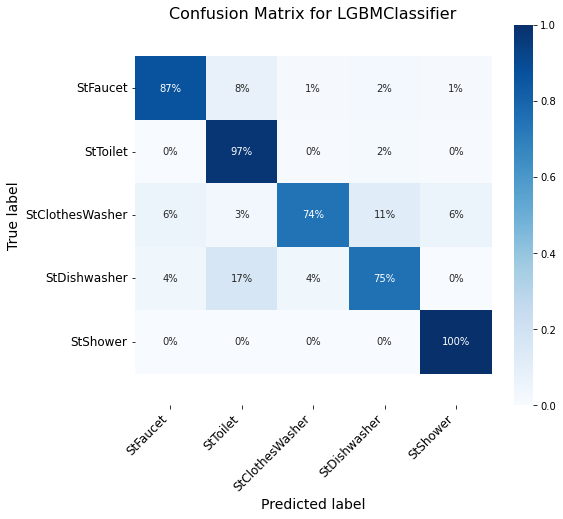

In [12]:
initalize_random_generators(seeds, 1)
# store all test results for best models and plot confusion matrices
all_tst_preds = pd.DataFrame(columns = best_models['algorithm'])
for ix, row in best_models.iterrows():
    # Re-train and save best model
    tst_preds, _, modelToSave = single_model_cv_and_test(folds,row['algorithm'],row['params'],X_test,y_test)    
    _, ax = get_confusion_matrix(y_test, tst_preds, plot=True)
    ax.set_title('Confusion Matrix for '+ row['algorithm'], fontsize=16)
    all_tst_preds[row['algorithm']]=tst_preds

In [13]:
print(best_models)

        algorithm                                             params  \
0  LGBMClassifier  {'learning_rate': 0.001, 'max_depth': 3, 'n_es...   

   median_f1score  
0        0.920909  


In [14]:
# save the model to disk
filename = os.path.join(RESULT_DIR, 'EUclassifier_pre.sav')
joblib.dump(modelToSave, filename)

['/connecticity/client/Challenge_Hydro_Privacy/results/EUclassifier_pre.sav']

In [15]:
# f1 scores
from sklearn.metrics import f1_score

# store all test results for best models and plot confusion matrices
for algorithm in all_tst_preds.columns:
    print(f"{algorithm}\ttest f1_score={f1_score(y_test, all_tst_preds[algorithm], average='micro'):.3f}".expandtabs(30))

LGBMClassifier                test f1_score=0.888
